## Лабораторная работа 0

Датасет: https://www.kaggle.com/datasets/igorkarayman/sanfrancisco-salary-3-years?resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Загрузка датасета

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department,Department_ML
0,36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,Fire,4
1,36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,Other,2
2,36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,Not dep,5
3,36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,Other,2
4,36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,Other,2


### Информация о датасете

In [3]:
data.columns

Index(['Unnamed: 0', 'Id', 'EmployeeName', 'JobTitle', 'BasePay',
       'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits',
       'Year', 'Department', 'Department_ML'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111881 entries, 0 to 111880
Data columns (total 13 columns):
Unnamed: 0          111881 non-null int64
Id                  111881 non-null int64
EmployeeName        111881 non-null object
JobTitle            111881 non-null object
BasePay             111881 non-null float64
OvertimePay         111881 non-null float64
OtherPay            111881 non-null float64
Benefits            111881 non-null float64
TotalPay            111881 non-null float64
TotalPayBenefits    111881 non-null float64
Year                111881 non-null int64
Department          111881 non-null object
Department_ML       111881 non-null int64
dtypes: float64(6), int64(4), object(3)
memory usage: 11.1+ MB


In [5]:
data.shape

(111881, 13)

#### Value_counts самостоятельно сократит вывод чтобы не выводить больше 1000 строк, и мы сможем увидеть 5 самых популярных профессий

In [25]:
data["JobTitle"].value_counts()

Transit Operator                6975
Special Nurse                   4381
Registered Nurse                3725
Public Svc Aide-Public Works    2514
Police Officer 3                2411
                                ... 
Head Airport Electrician           1
Pianist                            1
Asst Chf Prob Ofc, Juv Prob        1
Supervising Mediator, UFCS         1
Sr Cnselor, Juv Hall (SFERS)       1
Name: JobTitle, Length: 1109, dtype: int64

#### Но можно сделать правильно

In [26]:
data["JobTitle"].value_counts().nlargest(10)

Transit Operator                6975
Special Nurse                   4381
Registered Nurse                3725
Public Svc Aide-Public Works    2514
Police Officer 3                2411
Custodian                       2409
Firefighter                     2348
Recreation Leader               1968
Patient Care Assistant          1940
Deputy Sheriff                  1914
Name: JobTitle, dtype: int64

#### Можем также сгрупировать по сферам деятельности

In [33]:
data['JobTitle'].groupby(data['Department']).value_counts().nlargest(5)

Department  JobTitle                    
Fire        Transit Operator                6975
Medicine    Special Nurse                   4381
            Registered Nurse                3725
Police      Public Svc Aide-Public Works    2514
            Police Officer 3                2411
Name: JobTitle, dtype: int64

#### Довольно интересная статистика, показывающая несоответствие зарплаты и доходов

In [34]:
data['JobTitle'].groupby(data['TotalPayBenefits']).max()

TotalPayBenefits
0.00           Transit Fare Inspector
1.91                 Transit Operator
4.16                    Special Nurse
5.17                            Clerk
7.24                 Registered Nurse
                       ...           
422353.40      Chief, Fire Department
425815.28             Chief of Police
436224.36    Chief Investment Officer
479652.21           Asst Med Examiner
510732.68              Deputy Chief 3
Name: JobTitle, Length: 108040, dtype: object

In [35]:
data['JobTitle'].groupby(data['BasePay']).max()

BasePay
-166.01                       Junior Clerk
-121.63                       Junior Clerk
-109.22                       Junior Clerk
-106.60                       Junior Clerk
-101.88                       Junior Clerk
                          ...             
 313312.52     Executive Contract Employee
 313686.01          Chief, Fire Department
 315572.01    Dep Dir for Investments, Ret
 318835.49               Asst Med Examiner
 319275.01                 Chief of Police
Name: JobTitle, Length: 82832, dtype: object

### Проверка пустых записей

In [6]:
data.isna().sum()

Unnamed: 0          0
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Department          0
Department_ML       0
dtype: int64

### Удаление ненужных столбцов

In [7]:
data = data.drop('Unnamed: 0', axis=1)

In [8]:
data = data.drop('Id', axis=1)

In [9]:
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department,Department_ML
0,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,Fire,4
1,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,Other,2
2,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,Not dep,5
3,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,Other,2
4,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,Other,2


# Графики

## Матрица корреляциии признаков

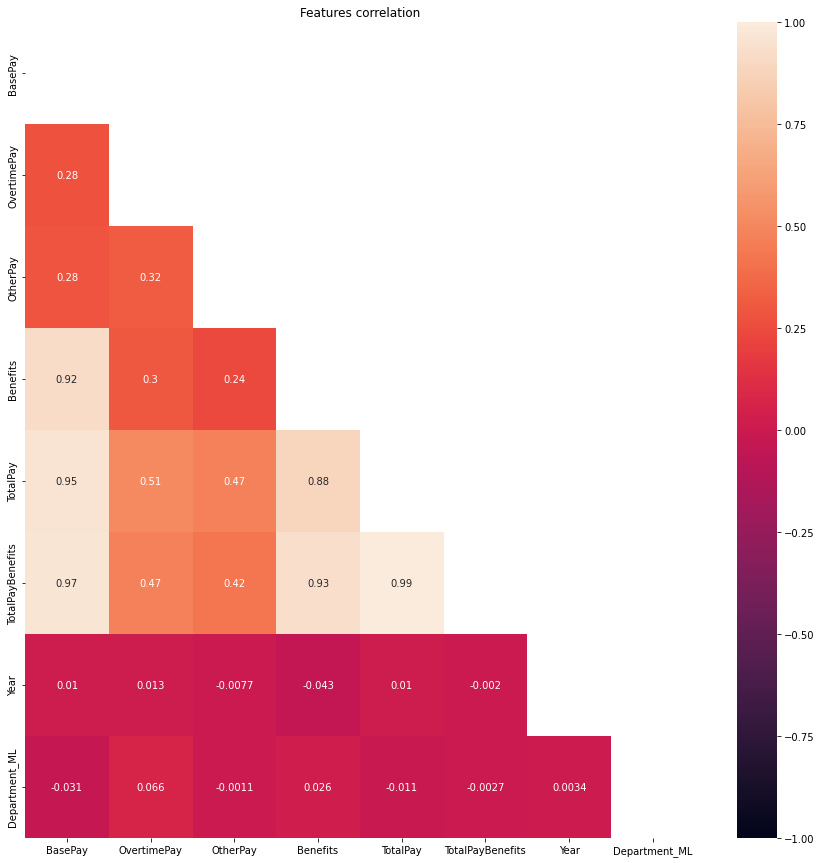

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title("Features correlation")
corr_df = data.corr()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True, mask=mask, ax=ax);

# Заработки

In [11]:
add_payments = ['BasePay', 'Benefits', 'TotalPay']

In [12]:
data[add_payments].describe()

,BasePay,Benefits,TotalPay
count,111881.000000,111881.000000,111881.000000
mean,67208.464335,25114.682525,76130.132232
std,43417.695515,15372.746237,51269.839386
min,-166.010000,-13.800000,0.000000
25%,33644.660156,12145.089844,37041.430000
50%,65547.040000,28698.490234,72630.700000
75%,95229.030000,35608.770000,107533.480000
max,319275.010000,96570.660000,471952.640000


In [13]:
plt.figure(figsize=(15, 6), dpi=1000)

for i, feat in enumerate(add_payments):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[feat])
    plt.title(str(feat))
    
plt.show()

# Количество работников по сферам деятельности

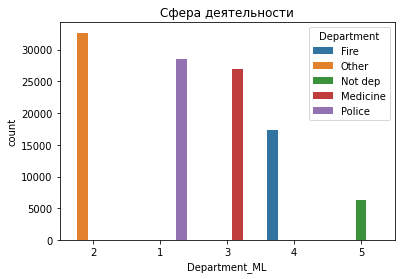

In [14]:
sns.countplot(x='Department_ML', hue='Department', data=data, order = data['Department_ML'].value_counts().index).set_title("Сфера деятельности");